In [59]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import dill as pickle
import networkx as nx
import matplotlib.pyplot as plt


plt.style.use("seaborn-whitegrid")
plt.rc("figure", 
       autolayout=True)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)

font = {'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 0, 'iterations')

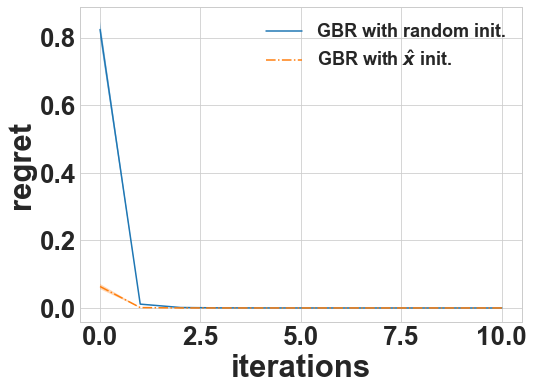

In [63]:
graph = 'Facebook'
game = 'BHG'
mode = 'sequential'
beta_mode = 'fully-homophily'
control_var = '0.5'
# with open(f'../result/{game}/sequential/b_uniform_{graph}_{beta_mode}.txt', 'r') as fid:
#     data = fid.readlines()
with open(f'../result/{game}/{mode}/b_uniform_{graph}_control-homophily_{control_var}.txt', 'r') as fid:
    data = fid.readlines()
# with open(f'../result/sequential/bestshot_{graph}.txt', 'r') as fid:
#     data = fid.readlines()

L_VK = []
L_BR = []
L_BRG = []
tmp_VK = []
tmp_BR = []
tmp_BRG = []
for line in data:
    line = line.rstrip()
    if line[0:3] == '---':
        L_VK.append(tmp_VK)
        L_BR.append(tmp_BR)
        L_BRG.append(tmp_BRG)
        tmp_VK = []
        tmp_BR = []
        tmp_BRG = [] 
    else:
        line = line.split(',')
        tmp_VK.append(float(line[0]))
        tmp_BR.append(float(line[1]))
        tmp_BRG.append(float(line[2]))

d_VK = pd.DataFrame(L_VK).T
d_BR = pd.DataFrame(L_BR).T
d_BRG = pd.DataFrame(L_BRG).T

fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(d_VK.index, d_VK.mean(axis=1), label='GBR with identical init.')
# ax.fill_between(d_VK.index, d_VK.mean(axis=1)-d_VK.sem(axis=1), d_VK.mean(axis=1)+d_VK.sem(axis=1), alpha=0.5)

ax.plot(d_BR.index, d_BR.mean(axis=1), label='GBR with random init.')
ax.fill_between(d_BR.index, d_BR.mean(axis=1)-d_BR.sem(axis=1)*1.96, d_BR.mean(axis=1)+d_BR.sem(axis=1)*1.96, alpha=0.4)

ax.plot(d_BRG.index, d_BRG.mean(axis=1), linestyle='-.', label='GBR with $\hat{x}$ init.')
ax.fill_between(d_BRG.index, d_BRG.mean(axis=1)-d_BRG.sem(axis=1)*1.96, d_BRG.mean(axis=1)+d_BRG.sem(axis=1)*1.96, alpha=0.3)

plt.legend(fontsize=18)
if beta_mode == 'fully-homophily':
    beta_mode = 'full-homophily'
# plt.title(f'{graph}; Var($\\beta_i$)={control_var}', fontsize=24)
# plt.title(f'{graph}; uniformly sampled costs; $95\%$ CI.', fontsize=24)
# plt.xlim(0, 1500)
# ax.set_xticklabels([-200, 0, 2000, 4000, 6000, 8000])
# ax.set_xticklabels([-200, 0, 1000, 2000, 3000, 4000])
# ax.set_xticklabels([-25, 0, 250, 500, 750, 1000, 1250])
plt.ylabel('regret')
plt.xlabel('iterations')

In [46]:
ax.get_xticklabels()

[Text(-25.0, 0, '−25'),
 Text(0.0, 0, '0'),
 Text(25.0, 0, '25'),
 Text(50.0, 0, '50'),
 Text(75.0, 0, '75'),
 Text(100.0, 0, '100'),
 Text(125.0, 0, '125')]

In [15]:
graph = 'SW'
data = pd.read_csv(f'../result/bestshot_{graph}.txt', sep=',', header=None)
data.columns = ['randomly initialized', 'group initialized']

In [16]:
data.mean()

randomly initialized    0.824870
group initialized       0.841385
dtype: float64

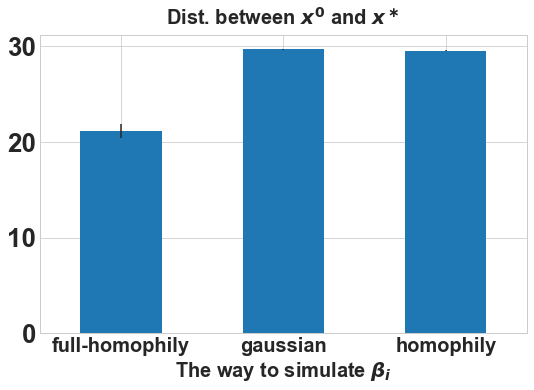

In [2]:
### how the distribution of \beta affects the distance
graph = 'Facebook'
game = 'LQG'
mode = 'sequential'
# aggreg_mode = 'mean-aggreg'
data = []
for key in ['homophily', 'gaussian', 'fully-homophily']:
    df = pd.read_csv(f'../result/{game}/{mode}/b_uniform_{graph}_{key}_stats.txt', header=None, sep=' ')
    df.columns = ['x_ne_q', 'y_ne_q', 'x_hat_q', 'y_hat_q', 'x_random_q', 'x_dist_vanilla', 'x_dist_group', 'x_dist_rand', 'y_dist']
    df['type'] = '(uniform, {})'.format(key)
    data.append(df)
data = pd.concat(data)

# ### read into fully homophily data
# df = pd.read_csv('../result/b_fully-homophily_{}_fully-homophily.txt'.format(graph), header=None, sep=' ')
# df[0] = '(fully-homophily, fully-homophily)'
# data = pd.concat([data, df])

# ### read into b_uniform_beta_fully-homophily data
# df = pd.read_csv('../result/b_uniform_{}_fully-homophily.txt'.format(graph), header=None, sep=' ')
# df[0] = '(uniform, fully-homophily)'
# data = pd.concat([data, df])

# ### read into b_uniform_beta_global-homophily data
# df = pd.read_csv('../result/b_uniform_{}_global-homophily.txt'.format(graph), header=None, sep=' ')
# df[0] = '(uniform, global-homophily)'
# data = pd.concat([data, df])

# ### read into b_uniform_beta_global-gaussian data
# df = pd.read_csv('../result/b_uniform_{}_global-gaussian.txt'.format(graph), header=None, sep=' ')
# df[0] = '(uniform, global-gaussian)'
# data = pd.concat([data, df])

# ### read into global homophily data
# df = pd.read_csv('../result/b_globalHomophily_{}_globalHomophily.txt'.format(graph), header=None, sep=' ')
# df[0] = 'globalHomophily'
# data = pd.concat([data, df])


Q = 'x_dist_group'
fig, ax = plt.subplots(figsize=(8, 6))
yerr = data.groupby(['type'])[Q].sem() * 1.96
# data.groupby(['type'])['dist_y'].mean().unstack().plot(kind='bar', yerr=yerr, ax=ax)
data.groupby(['type'])[Q].mean().plot(kind='bar', yerr=yerr, ax=ax)
ax.set_xticklabels(['full-homophily', 'gaussian', 'homophily'], rotation=360, fontsize=20)
plt.xlabel('The way to simulate $\\beta_i$', fontsize=20)
if Q == 'x_hat_q':
    plt.ylabel('Regret of $\hat{x}$')
elif Q == 'y_dist':
    plt.ylabel('$||\\hat{y} - y^\\ast ||_2$')
# elif Q == 'x_dist':
#     plt.ylabel('$||\\hat{x} - x^\\ast ||_2$')
# plt.ylabel('$\hat{x}$ regret')
# plt.legend(fontsize=18)
# plt.title(f'{graph}; $b_i = $uniform', fontsize=20)
plt.title('Dist. between $x^0$ and $x^\\ast$', fontsize=20)
plt.tight_layout()
# plt.savefig('../result/figure/{}-{}.pdf'.format(graph, Q), dpi=300)

In [5]:
# ### the distribution of \beta v.s. between-group similarity
# graph = 'SBM'
# data = []
# for key in ['uniform', 'gaussian', 'homophily']:
#     df = pd.read_csv('../result/b_uniform_{}_{}_betweenGroup.txt'.format(graph, key), header=None, sep=' ')
#     df[2] = key
#     data.append(df)
# data = pd.concat(data)

# ### read into fully homophily data
# df = pd.read_csv('../result/b_fully-homophily_{}_fully-homophily.txt'.format(graph), header=None, sep=' ')
# df[2] = 'fullyHomophily'
# data = pd.concat([data, df])

# # ### read into global homophily data
# # df = pd.read_csv('../result/b_globalHomophily_{}_globalHomophily_betweenGroup.txt'.format(graph), header=None, sep=' ')
# # df[2] = 'globalHomophily'
# # data = pd.concat([data, df])

# plt.figure(figsize=(12,4))
# yerr = data.groupby(2)[1].sem() * 1.96
# data.groupby(2)[1].mean().plot(kind='bar', yerr=yerr)
# plt.xticks(rotation=0, fontsize=16)
# plt.xlabel(None)
# plt.ylabel('between-group similarity', fontsize=18)
# plt.tight_layout()

(0.0, 20.0)

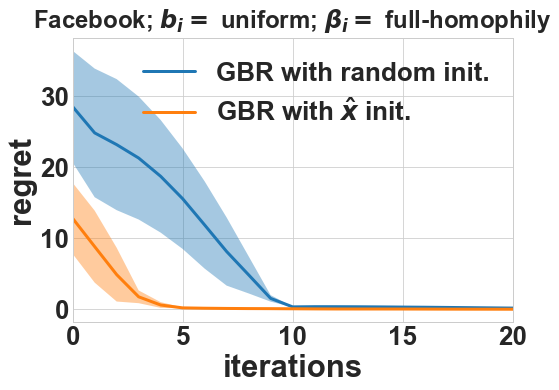

In [71]:
graph = 'Facebook'
b_mode = 'uniform'
beta_mode = 'fully-homophily'
with open(f'../result/trajectory/b_{b_mode}_{graph}_{beta_mode}_traj.txt', 'r') as fid:
    data = fid.readlines()

T_random = []
T_xhat = []
t = []
idx = 50
for line in data:
    line = line.rstrip()
    if line != '#':
        t.append(list(map(float, line.split())))
    else:
        t = t[:idx]
        T_random.append([item[0] for item in t])
        T_xhat.append([item[1] for item in t])
        t = []

T_random = np.array(T_random)
T_xhat = np.array(T_xhat)
fig, ax = plt.subplots(figsize=(8, 6))

x = range(T_random.shape[1])
y_random = T_random.mean(axis=0)
y_xhat = T_xhat.mean(axis=0)

std_random = T_random.std(axis=0)
std_xhat = T_xhat.std(axis=0)

ax.set_ylabel('regret')
ax.set_xlabel('iterations')
ax.plot(x, y_random, linewidth=3, label='GBR with random init.')
ax.fill_between(x, y_random-std_random, y_random+std_random, alpha=0.4)

ax.plot(x, y_xhat, linewidth=3, label='GBR with $\hat{x}$ init.')
ax.fill_between(x, y_xhat-std_xhat, y_xhat+std_xhat, alpha=0.4)

if beta_mode == 'fully-homophily':
    beta_mode = 'full-homophily'
plt.title(f'{graph}; $b_i = $ uniform; $\\beta_i =$ {beta_mode}', fontsize=24)
plt.legend()
plt.xlim(0, 20)

# plt.savefig(f'../result/figure/{graph}_{b_mode}_{beta_mode}_traj.pdf', dpi=300)

In [2]:
with open('../result/tmp.txt', 'r') as fid:
    ret = fid.readlines()

x_ne = np.array(list((map(float, ret[0].rstrip().split()))))
y_ne = np.array(list((map(float, ret[1].rstrip().split()))))
comms = [list(map(int, item.rstrip().split())) for item in ret[2:]]

(array([30.,  2.,  1.,  5.,  7.,  2.,  5.,  3.,  2.,  2.]),
 array([0.        , 0.098673  , 0.19734601, 0.29601901, 0.39469202,
        0.49336502, 0.59203802, 0.69071103, 0.78938403, 0.88805704,
        0.98673004]),
 <BarContainer object of 10 artists>)

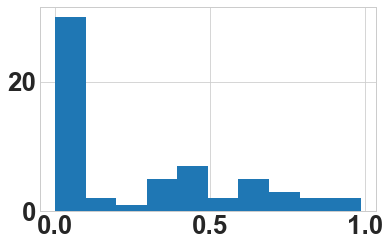

In [3]:
plt.hist(x_ne[comms[8]], bins=10)

In [7]:
len(comms)

12

In [4]:
(np.count_nonzero(x_ne == 1) + np.count_nonzero(x_ne == 0)) / len(x_ne) 

0.60609061648923

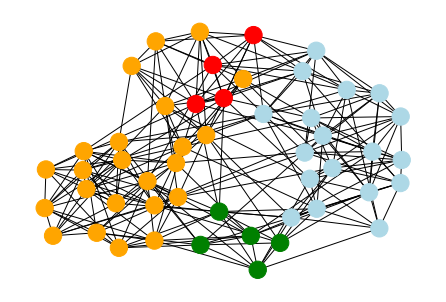

In [18]:
from utils import gen_graph, extract_community, gen_group_graph, gen_b, gen_beta, random_community

n = 50
graph = 'SW'
G = gen_graph(n, graph)
comms = extract_community(G, graph)

color = ['orange', 'lightblue', 'green', 'red']
color_map = [None] * n
for idx, nodes in comms.items():
    for i in nodes:
        color_map[i] = color[idx]
        
nx.draw(G, node_color=color_map)

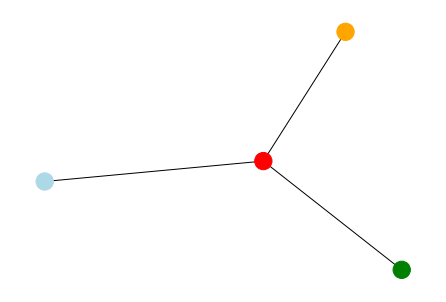

In [21]:
GG = gen_group_graph(G, comms)
nx.draw(GG, node_color=color)